**Level 2**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
file_path = Path(r"C:\Users\krishna vora\OneDrive\Desktop\cognifyz task\Dataset .csv")
df = pd.read_csv(file_path, encoding="utf-8")

col_rating = "Aggregate rating"
col_votes = "Votes"

In [44]:
print("\n=== Basic Rating Statistics ===")
print(df[col_rating].describe())



=== Basic Rating Statistics ===
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


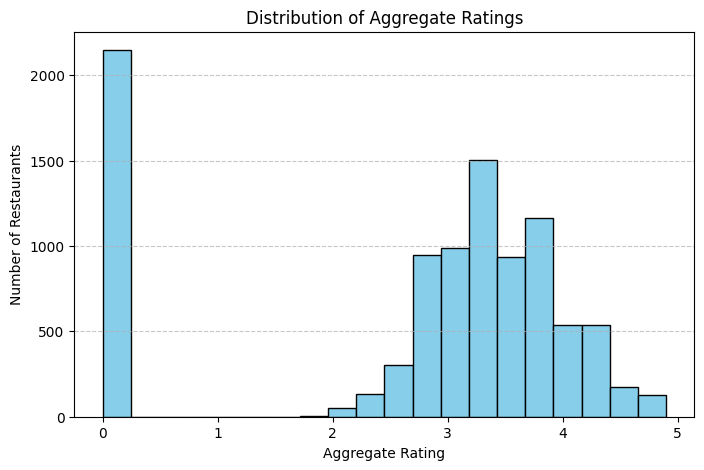

In [45]:
plt.figure(figsize=(8,5))
plt.hist(df[col_rating], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
rating_counts = df[col_rating].value_counts().sort_index()
most_common_rating = rating_counts.idxmax()
most_common_count = rating_counts.max()

print(f"\nMost common rating value: {most_common_rating} ({most_common_count} restaurants)")


Most common rating value: 0.0 (2148 restaurants)



Average number of votes received by restaurants: 156.91


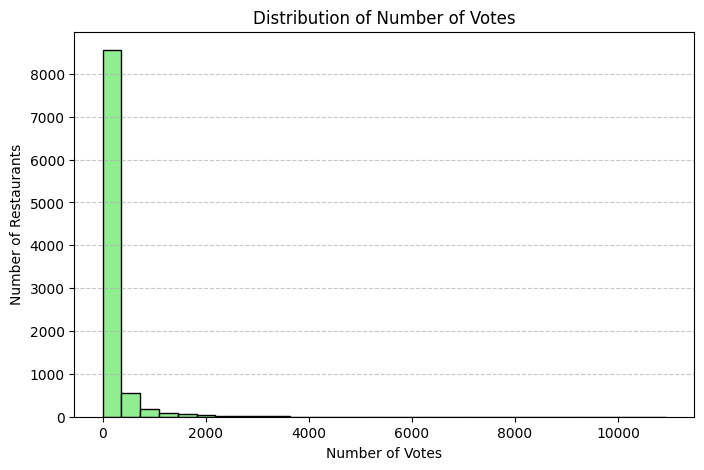

In [47]:
avg_votes = df[col_votes].mean()
print(f"\nAverage number of votes received by restaurants: {avg_votes:.2f}")

plt.figure(figsize=(8,5))
plt.hist(df[col_votes], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
#task 2:
import pandas as pd
import matplotlib.pyplot as plt



In [49]:
col_cuisine = "Cuisines"
col_rating = "Aggregate rating"

In [50]:
df[col_cuisine] = df[col_cuisine].fillna("").apply(lambda x: ", ".join([c.strip() for c in x.split(",") if c.strip()]))

In [51]:
combo_counts = df[col_cuisine].value_counts().reset_index()
combo_counts.columns = ["Cuisine Combination", "Restaurant Count"]

In [52]:
top10_combos = combo_counts.head(10)
print("\n=== Top 10 Most Common Cuisine Combinations ===")
print(top10_combos)


=== Top 10 Most Common Cuisine Combinations ===
              Cuisine Combination  Restaurant Count
0                    North Indian               936
1           North Indian, Chinese               511
2                         Chinese               354
3                       Fast Food               354
4           North Indian, Mughlai               334
5                            Cafe               299
6                          Bakery               218
7  North Indian, Mughlai, Chinese               197
8                Bakery, Desserts               170
9                     Street Food               149


In [53]:
combo_ratings = df.groupby(col_cuisine)[col_rating].mean().reset_index()
combo_ratings.columns = ["Cuisine Combination", "Average Rating"]

In [54]:
combo_summary = pd.merge(combo_counts, combo_ratings, on="Cuisine Combination")

top_rated_combos = combo_summary.sort_values("Average Rating", ascending=False).head(10)
print("\n=== Top 10 Cuisine Combinations by Average Rating ===")
print(top_rated_combos)


=== Top 10 Cuisine Combinations by Average Rating ===
                  Cuisine Combination  Restaurant Count  Average Rating
336                 Sunda, Indonesian                 3             4.9
1030                Hawaiian, Seafood                 1             4.9
1149          Burger, Bar Food, Steak                 1             4.9
1263         BBQ, Breakfast, Southern                 1             4.9
772               Continental, Indian                 1             4.9
593           American, Burger, Grill                 1             4.9
659   Mexican, American, Healthy Food                 1             4.9
841      Italian, Bakery, Continental                 1             4.9
1606     American, Caribbean, Seafood                 1             4.9
968                     Italian, Deli                 1             4.9


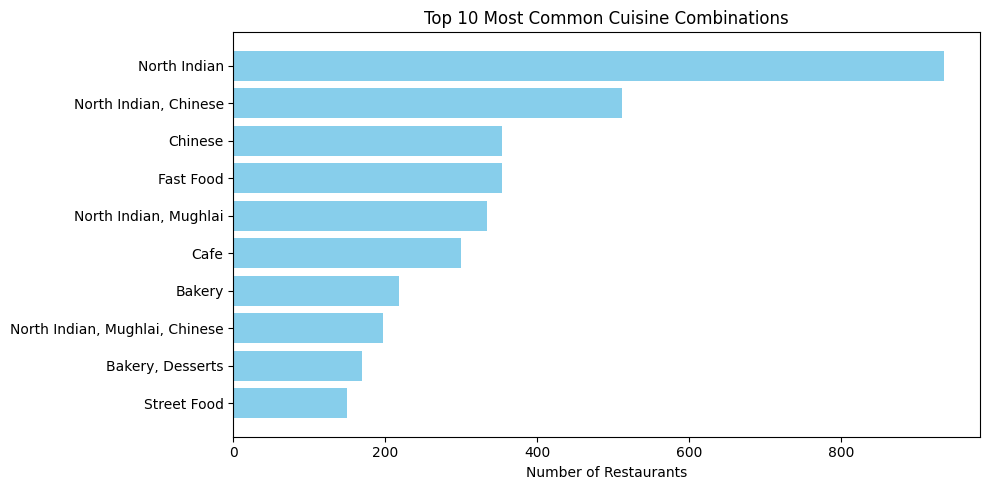

In [55]:
plt.figure(figsize=(10,5))
plt.barh(top10_combos["Cuisine Combination"], top10_combos["Restaurant Count"], color='skyblue')
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

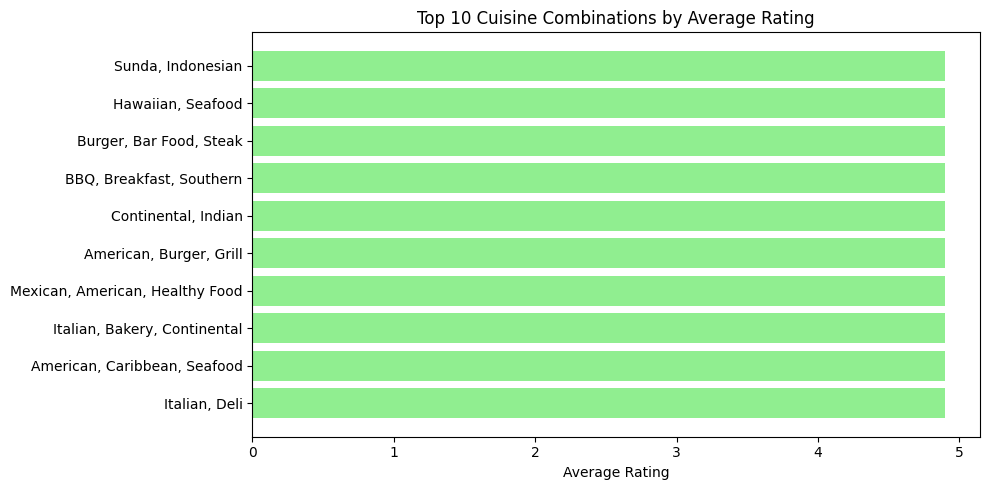

In [56]:
plt.figure(figsize=(10,5))
plt.barh(top_rated_combos["Cuisine Combination"], top_rated_combos["Average Rating"], color='lightgreen')
plt.title("Top 10 Cuisine Combinations by Average Rating")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [57]:
#task 3
import plotly.express as px
col_city = "City"
col_lat = "Latitude"
col_long = "Longitude"


In [58]:
print("Missing latitude values:", df[col_lat].isna().sum())
print("Missing longitude values:", df[col_long].isna().sum())

df = df.dropna(subset=[col_lat, col_long])

Missing latitude values: 0
Missing longitude values: 0


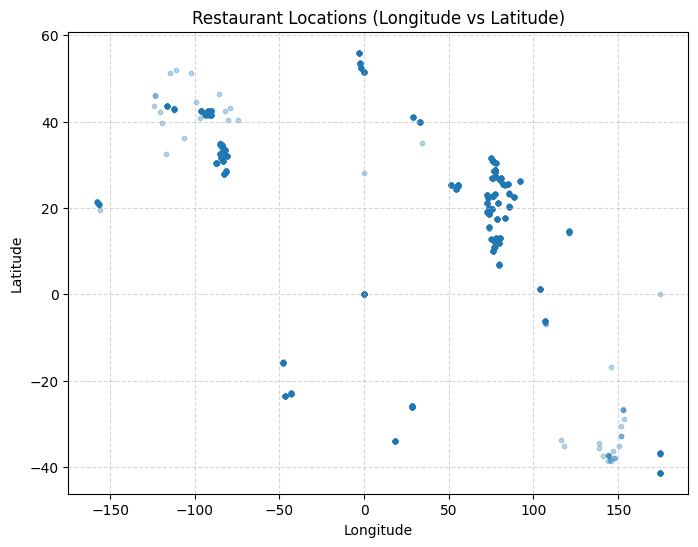

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(df[col_long], df[col_lat], alpha=0.3, s=10)
plt.title("Restaurant Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [60]:
fig = px.scatter_mapbox(
    df,
    lat=col_lat,
    lon=col_long,
    color=col_city,
    zoom=3,
    height=600,
    title="Restaurant Locations by City",
    hover_data=["Restaurant Name", "Cuisines", "Aggregate rating"]
)


In [61]:
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Step 7: Optional – Analyze clusters by city
city_counts = df[col_city].value_counts().head(10)
print("\n=== Top 10 Cities with Most Restaurant Locations ===")
print(city_counts)


=== Top 10 Cities with Most Restaurant Locations ===
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [62]:
#task 4
col_name = "Restaurant Name"
col_rating = "Aggregate rating"
col_votes = "Votes"

chain_counts = df[col_name].value_counts().reset_index()
chain_counts.columns = ["Restaurant Name", "Branch Count"]

chains = chain_counts[chain_counts["Branch Count"] > 1]
print(f"\nTotal restaurant chains found: {len(chains)}")
print("\nTop 10 Restaurant Chains by Number of Branches:")
print(chains.head(10))



Total restaurant chains found: 734

Top 10 Restaurant Chains by Number of Branches:
    Restaurant Name  Branch Count
0   Cafe Coffee Day            83
1    Domino's Pizza            79
2            Subway            63
3  Green Chick Chop            51
4        McDonald's            48
5         Keventers            34
6         Pizza Hut            30
7             Giani            29
8    Baskin Robbins            28
9   Barbeque Nation            26


In [63]:
chain_stats = (
    df.groupby(col_name)
      .agg(
          Branch_Count=("Restaurant Name", "count"),
          Average_Rating=(col_rating, "mean"),
          Total_Votes=(col_votes, "sum")
      )
      .reset_index()
)


In [64]:
chain_stats = chain_stats[chain_stats["Branch_Count"] > 1]

top_rated_chains = chain_stats.sort_values("Average_Rating", ascending=False).head(10)
top_popular_chains = chain_stats.sort_values("Total_Votes", ascending=False).head(10)


In [65]:
print("\n=== Top 10 Highest-Rated Restaurant Chains ===")
print(top_rated_chains)

print("\n=== Top 10 Most Popular Restaurant Chains (by Votes) ===")
print(top_popular_chains)


=== Top 10 Highest-Rated Restaurant Chains ===
                Restaurant Name  Branch_Count  Average_Rating  Total_Votes
6263           Talaga Sampireun             3           4.900         5514
102     AB's Absolute Barbecues             2           4.850         3151
5850           Silantro Fil-Mex             2           4.850         1364
101   AB's - Absolute Barbecues             4           4.825        13400
4464         Naturals Ice Cream             2           4.800         3094
2806                   Gymkhana             2           4.700          328
6504     The Cheesecake Factory             2           4.650         3010
2076                    Dishoom             2           4.600         1269
2585          Garota de Ipanema             2           4.600           59
1510                    Chili's             5           4.580         8156

=== Top 10 Most Popular Restaurant Chains (by Votes) ===
                Restaurant Name  Branch_Count  Average_Rating  Total_

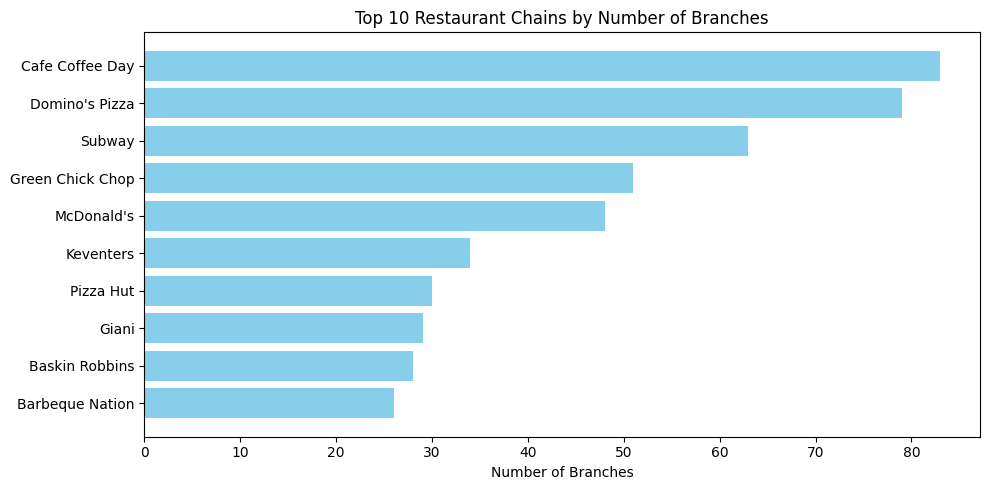

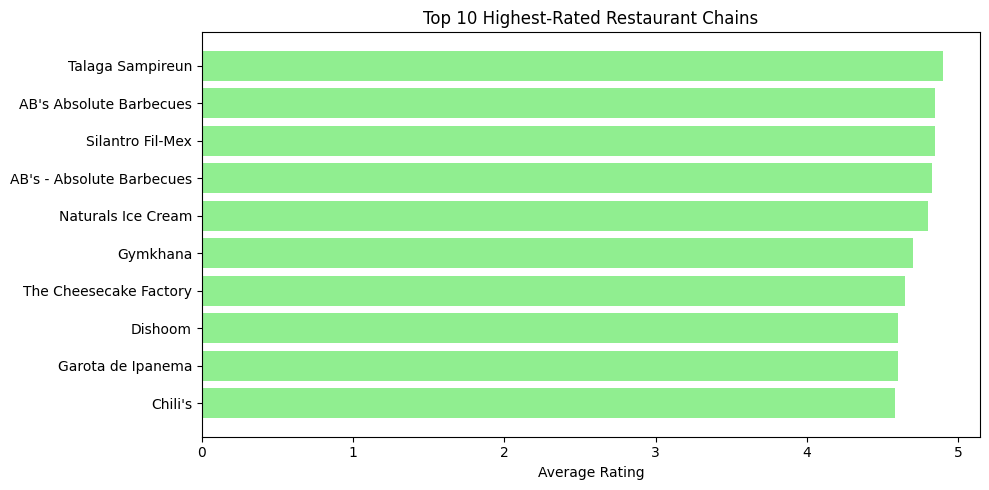

In [66]:
plt.figure(figsize=(10,5))
plt.barh(chains.head(10)["Restaurant Name"], chains.head(10)["Branch Count"], color="skyblue")
plt.title("Top 10 Restaurant Chains by Number of Branches")
plt.xlabel("Number of Branches")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.barh(top_rated_chains["Restaurant Name"], top_rated_chains["Average_Rating"], color="lightgreen")
plt.title("Top 10 Highest-Rated Restaurant Chains")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
